# Exploratory Data Analysis

This notebook focuses on understanding the data and to find any interesting observations that can be used for feature extraction and also get some insights.



In [ ]:
# necessary python library imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading data using pandas
'''
Data: time series
-----
Features:
  date: datetime format
  store: categorical, 10 different stores
  item: categorical, 50 different items
  sales: numeric
'''

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [ ]:
train.head() # shows first 5 examples in data

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
'''
 we have 913000 examples, 50 items, 10 stores in train data

so the sales data is collected from 1826 days or 5 years 
(since the frequency is daily)
'''

train.shape #shape of the data showing number of examples and features

(913000, 4)

In [ ]:
'''
Test data has 45000 examples and 4 features.
It has missing 'sales' feature which needs to be predicted.

test data is a collection of 3 months time series data
'''

test.shape

(45000, 4)

In [ ]:
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [ ]:
# basic statistics of the numerical features

train.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [ ]:
train.isna().sum() #checking for missing values

# there are no missing values 
# this is a good quality dataset

date     0
store    0
item     0
sales    0
dtype: int64

In [ ]:
train.nunique(axis=0) # total number of unique elements in each feature

date     1826
store      10
item       50
sales     213
dtype: int64

In [ ]:
def datetime(df):
  '''
  Method to convert the date column which 
  would be easily understood by pandas
  '''
  df.date = pd.to_datetime(df.date).values
  temp = df.set_index('date', drop=True)

  return temp

train = datetime(df)

In [ ]:
train.head() # datetime as index

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


# Trends and Seasonality

Some plots are made to observe the trends and seasonality in the train data. Since it is messy to plot sales data relating to individual stores and items, I have aggregated (added) all sales values of all items in the store to give an aggregated sales value. This value is used to make a time series plot.

In [ ]:
'''
Plot showing aggregate sales value for all the years in different frequencies
i.e, we add all sales values corresponding to every store and also their correspomding items

'''

def plot(df, freq):

  if freq == 'D':
    frequency = 'Daily'
  elif freq == 'W':
    frequency = 'Weekly'
  elif freq == 'M':
    frequency = 'Monthly'
  elif freq == 'Q':
    frequency = 'Quarterly'


  df = df.resample(freq).sum() # summing all sales values for each month

  fig, ax = plt.subplots(figsize=(15,5))
  sns.lineplot(data=df.sales, ax=ax, 
                color='blue')

  ax.set(xlabel = "Date",
          ylabel = "Sales",
          title = f"{frequency} Aggregated Sales Values")

  sns.despine()


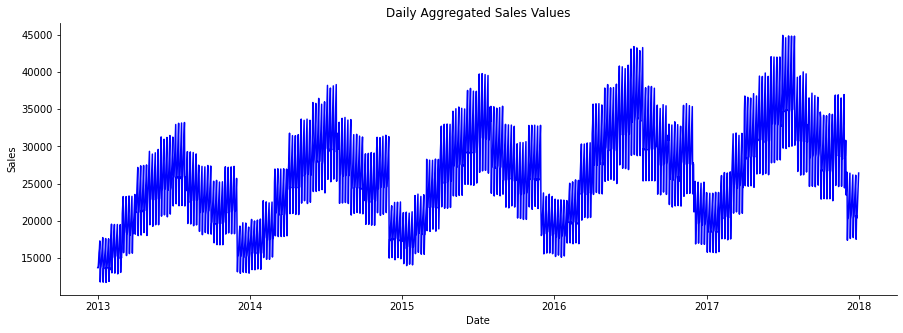

In [ ]:
# daily sales

'''
Initial observation: trends and seasonality can be noticed but because of high 
density of points, it is a bit messy. 
'''

plot(train,'D')

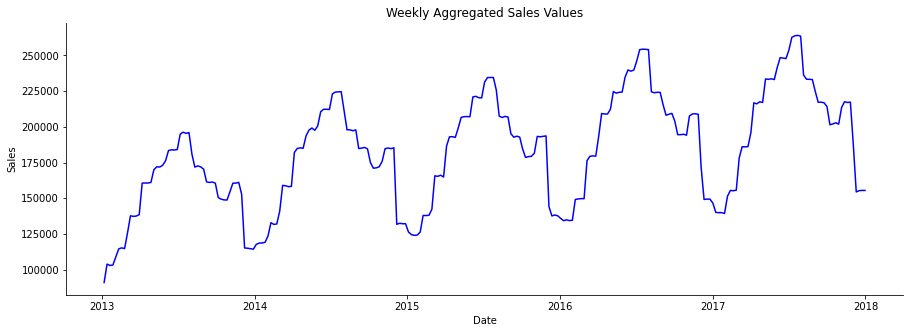

In [ ]:
# weekly sales

'''
The trend and seasonality can be seen a bit clearly as we
aggregate the values weekly.
i.e, we add sales values over the week for all stores and items.

Mid- year shows the highest peak in sales (around July and August)

Second peak sales can be observed towards the end of year which can
be a case of Christmas purchases. (If this is a retail based data).

Lowest sales are at the beginning of the year.
'''

plot(train,'W')

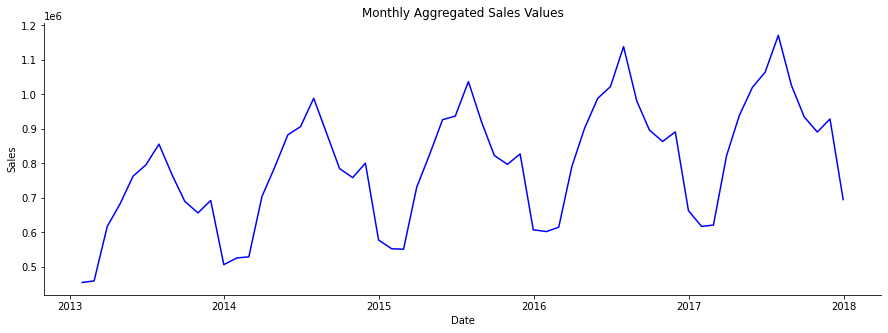

In [ ]:
# monthly sales

plot(train,'M')

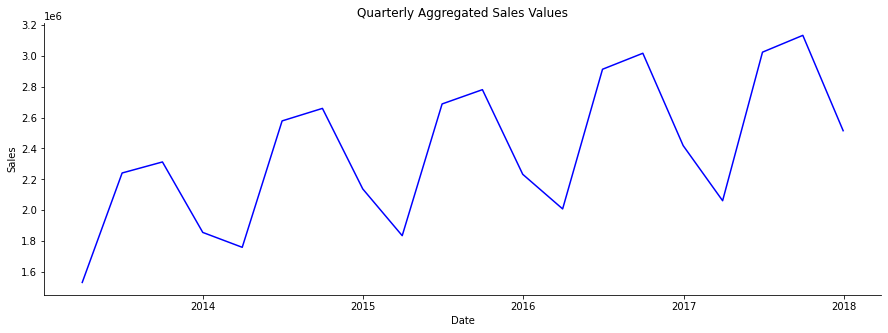

In [ ]:
# quarterly sales

plot(train,'Q')

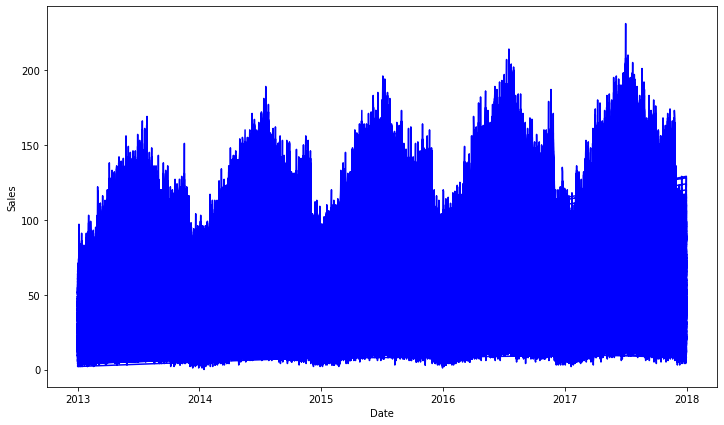

In [ ]:
'''
Plot for daily sales values, which shows the trend through out the 
years but it is a messy plot
'''
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(train.index,train.sales,color='blue')
ax.set(xlabel="Date",ylabel="Sales")

plt.show()

# Analysis on stores and items based on sales volume

Here, the analysis is done to find out which store has the overall
highest number of sales and also which item is sold the highest.

This would give us an idea on what markets to focus on and also an idea
on the wants of the customers.

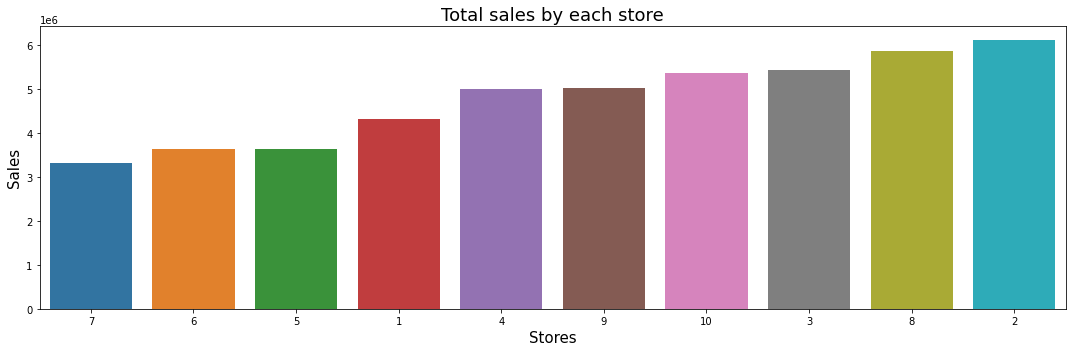

In [ ]:
'''
Some interesting plots relating to the aggregate statistics:

Plot of total sales done by each store in the 5 year period

The plot is made in increasing order and we can see the
top three stores as: 2, 8, 3
'''

df_group_store = train.groupby('store').sum('sales').sort_values("sales")
df_group_store['stores'] = df_group_store.index
df_group_store['stores'] = df_group_store['stores'].astype('str')
plt.figure(figsize=(15,5))

sns.barplot(x=df_group_store.stores, y=df_group_store.sales)

plt.xlabel("Stores", size=15)
plt.ylabel("Sales", size=15)
plt.title("Total sales by each store", size=18)
plt.tight_layout()
plt.savefig( 'images/totalsales.jpg', bbox_inches='tight', dpi=200)


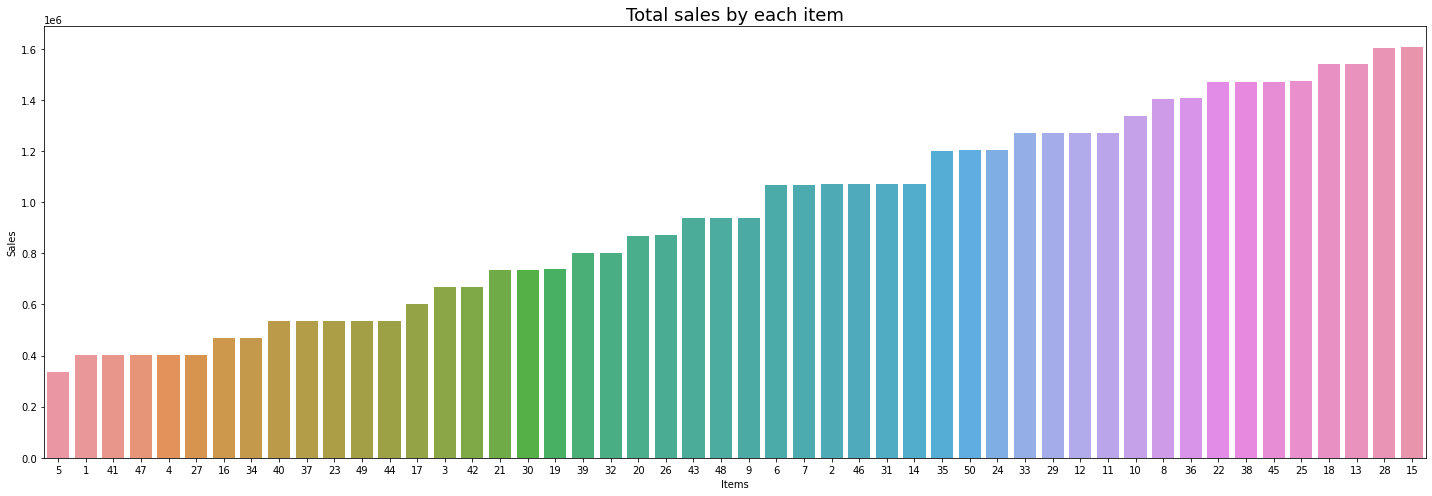

In [ ]:
'''
Plot of total sales done for each item regardless the store in the 5 year period

The plot is made in increasing order and we can see the
top three items sold as: 15, 28, 13
'''

df_group_item = train.groupby('item').sum('sales').sort_values("sales")
df_group_item['itemss'] = df_group_item.index
df_group_item['itemss'] = df_group_item['itemss'].astype('str')
plt.figure(figsize=(20,7))

sns.barplot(x=df_group_item.itemss, y=df_group_item.sales)

plt.xlabel("Items")
plt.ylabel("Sales")
plt.title("Total sales by each item", size=18)
plt.tight_layout()

In [ ]:
'''
This analysis provides insights on which store sold the most number of what items.

The dataframe below shows columns as stores (numbered from 1 to 10).
Every store column has the item number ranked from highest selling item to 
the lowest selling items (decreasing order of sales volume)
'''


items = []

for i in range(1,11):
  items.append(train[(train['store']==i)].groupby('item').sum('sales')['sales'].sort_values(ascending=False).index)

df_best_items = pd.DataFrame(items).T

df_best_items.columns = [f'store_{i}' for i in range(1,11)]

df_best_items

# This dataframe shows the decending order of the best items sold at each store 

,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10
0,15,28,15,15,15,15,15,15,15,15
1,28,15,28,28,28,28,28,28,28,28
2,18,18,13,13,13,13,18,18,18,18
3,13,13,18,18,18,18,13,13,13,13
4,38,25,38,25,45,25,25,25,25,45
5,22,45,45,45,22,38,22,38,45,22
6,25,38,22,22,38,45,45,45,22,25
7,45,22,25,38,25,22,38,22,38,38
8,8,8,36,36,36,36,8,8,36,36
9,36,36,8,8,8,8,36,36,8,8


In [ ]:
df_best_items.head(3) # top 3 items at each store

# except store 2, every store has item 15 as top selling item
# item 5 is the least sold item in all stores

,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10
0,15,28,15,15,15,15,15,15,15,15
1,28,15,28,28,28,28,28,28,28,28
2,18,18,13,13,13,13,18,18,18,18


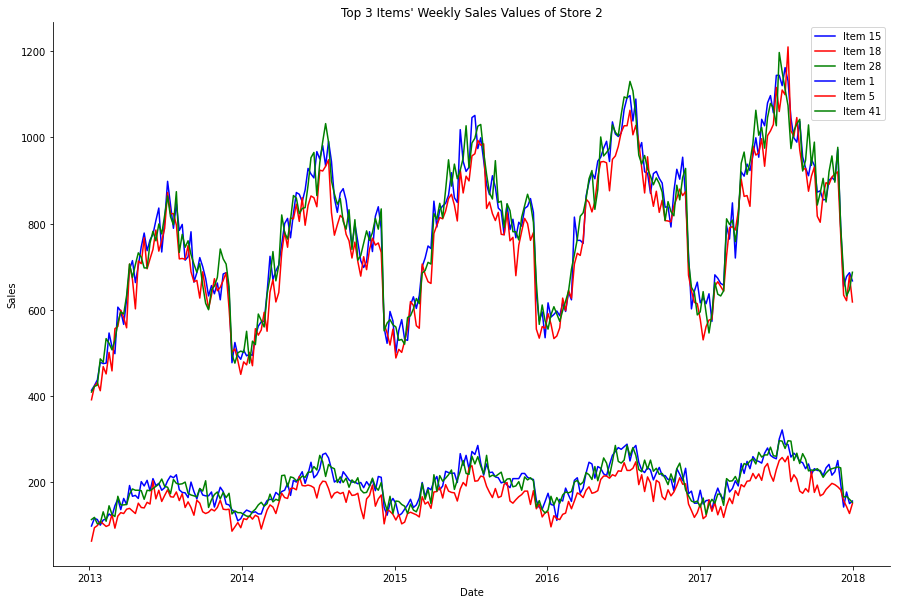

In [ ]:
# plot of top and bottom 3 items of store 2 (weekly sales)

fig, ax = plt.subplots(figsize=(15,7))
sns.lineplot(data=train[(train['store']==2)].query('item==15').resample('W').sum().sales, ax=ax, 
              label='Item 15', color='blue')
sns.lineplot(data=train[(train['store']==2)].query('item==18').resample('W').sum().sales, ax=ax, 
              label='Item 18', color='red')
sns.lineplot(data=train[(train['store']==2)].query('item==28').resample('W').sum().sales, ax=ax, 
              label='Item 28', color='green')

sns.lineplot(data=train[(train['store']==2)].query('item==1').resample('W').sum().sales, ax=ax, 
              label='Item 1', color='blue')
sns.lineplot(data=train[(train['store']==2)].query('item==5').resample('W').sum().sales, ax=ax, 
              label='Item 5', color='red')
sns.lineplot(data=train[(train['store']==2)].query('item==41').resample('W').sum().sales, ax=ax, 
              label='Item 41', color='green')

ax.set(xlabel = "Date",
        ylabel = "Sales",
        title = "Top and bottom 3 Items' Weekly Sales Values of Store 2")

sns.despine()


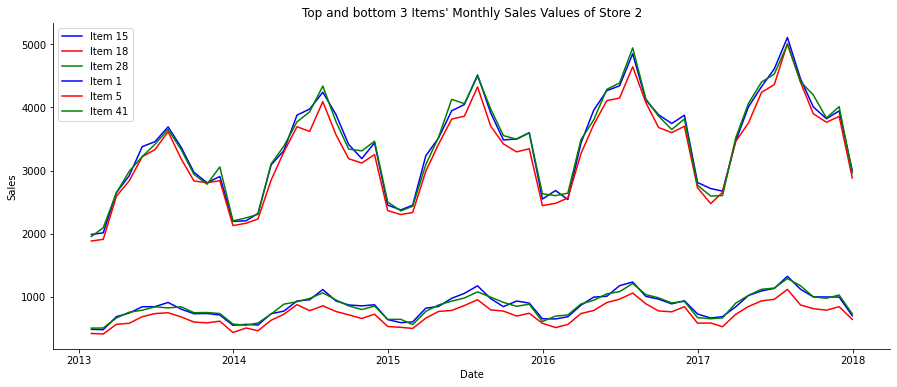

In [ ]:
# plot of top and bottom 3 items of store 2 (monthly sales)

fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=train[(train['store']==2)].query('item==15').resample('M').sum().sales, ax=ax, 
              label='Item 15', color='blue')
sns.lineplot(data=train[(train['store']==2)].query('item==18').resample('M').sum().sales, ax=ax, 
              label='Item 18', color='red')
sns.lineplot(data=train[(train['store']==2)].query('item==28').resample('M').sum().sales, ax=ax, 
              label='Item 28', color='green')

sns.lineplot(data=train[(train['store']==2)].query('item==1').resample('M').sum().sales, ax=ax, 
              label='Item 1', color='blue')
sns.lineplot(data=train[(train['store']==2)].query('item==5').resample('M').sum().sales, ax=ax, 
              label='Item 5', color='red')
sns.lineplot(data=train[(train['store']==2)].query('item==41').resample('M').sum().sales, ax=ax, 
              label='Item 41', color='green')

ax.set(xlabel = "Date",
        ylabel = "Sales",
        title = "Top and bottom 3 Items' Monthly Sales Values of Store 2")

sns.despine()
plt.savefig( 'images/topandbottom.jpg', bbox_inches='tight', dpi=200)